## EDA & Feature Extraction 

### 1. Context

This is the notebook containing the feature extraction and Exploratory Data Analysis (EDA) process for the project Fatigue Driving Risk Reduction in Commenced Journey. It will give readers preliminary insights into the data acquired, initial procurement of blinking features, and analysis of such features. As a recommendation, the proposal document of the project can be referenced for more information on the tasks and case at hand. Below is a summary extract:

In the Netherlands, approximately 15 to 20 percent of road accidents is directly related to drowsiness while driving (SWOV, 2019). However, studies that used primarily pre-determined crash characteristics (e.g. no skid mark) estimated that the figure can go up to 30 percent. A meta-analysis has also shown that tired drivers are 29 percent more likely to be at risk of accidents (Moradi et al., 2019). While varying in terms of figure, these studies all agree on one thing – fatigue driving is a common occurrence among motorists and can cause fatal events.
To address this problem, various products are available on the market. However, the majority  utilize an alarm system or similar mechanism to wake the users up if they are detected to be drowsy (e.g. head tilting forward 30 degrees). This is not a safe solution due to the false sense of security induced. Firstly, the detection happens only when the signs are clear. This means that the motorist may have already slipped into a micro-sleep, resulting in an accident. Secondly, the notion seems to be that the system can wake the driver up to continue driving without break. However, researchers have shown that mentally fatigued individuals have problems blocking out distracting stimuli, leading to an increase in errors when making decisions (Faber et al., 2012). Thus, continuous drowsy driving should not be the answer to any risk-reducing product. To find a more appropriate path, the research into a product that is non-intrusive, mechanically transparent, and with thorough consideration of impact is needed.

The project “Fatigue Driving Risk Reduction in Commenced Journey” aims to research a product that can reduce as much risk of fatigue driving as possible during an ongoing journey. ¬Researchers have demonstrated the positive correlation between blink attributes (e.g. frequency, duration) and the fatigue level of an individual through eye tracking and measurements (McIntire et al., 2014).  Furthermore, another research suggested that fatigue features can fall into pattern (E. Tadesse et al., 2014). Based on the given papers, Deep Learning in combination with Computer Vision (a field of AI where machines are taught to see the visual world) can be helpful in determining subtle signs of drowsiness. The latter can collect the necessary input through eyes tracking while the former can be used to derive meaningful outcome from the pattern of such input.


### 2. Feature extraction

Most projects on fatigue driving detection focus on using images to decide whether or not the driver is in a drowsy state. While such method is not entirely incorrect, it implicitly limits the attributes of fatigue recognition to shutted eyes or mouth opening wide (yawning). The notion in this assignment is to challenge that limitation. Instead of using images, videos will be used to capture blink attributes to detect fatigue in its early and late stages. Thereby satisfying the need for an algorithm to pick up on not just the late fatigue signs, but also the early symptoms for preventive measures. As recommended by McIntire et al. (2014), blinking frequency and duration can be used as indicators for fatigue level. Furthermore, a technical study of drowsiness based on blink behaviour suggested that amplitude can be another attribute for consideration (Svensson, 2004).

After much research, the video data to use for feature extraction is the University of Texas at Arlington Real-Life Drowsiness Dataset (UTA-RLDD). It contains video recordings of 60 people. The format is 3 videos per person depicting their vigilance states (alert, low vigilance, and drowsy). It has been ensured by the collectors that these videos are taken and labeled as realistically as possible (e.g. real time capturing when experiencing one of the three states). Thus, it is more promising as compared to image sets or videos where participants pretend to be tired.

Figure 1: 
Examples of frames

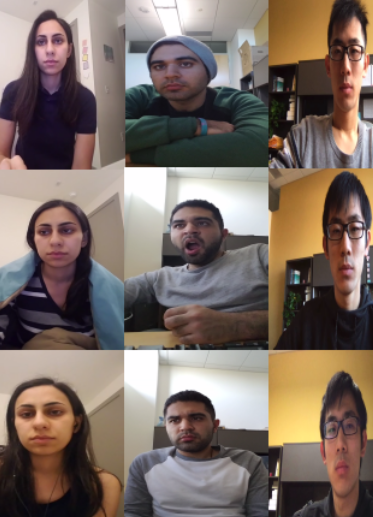

Note: alert - first row, low vigilance - second row, drowsy - third row

The collection of videos also attempted to deal with diversity. There are different ethnicities (10 Caucasian, 5 Hispanic, 30 IndoAryan and Dravidian, 8 Middle Eastern, and 7 East Asian) and different ages (from 20 to 59 years old with a mean of 25 and standard deviation of 6). Situationally, 21/180 videos have author with glasses, considerable facial hair is also present in 72/180. It is noteworthy that angles varies and frame rate is always less than 30fps to simulate reality.

#### 2.1. Video download

The first part of the extraction process is the downloading of the videos. Although each video is roughly 10 minutes long, they have been trimmed to the last three minutes to reduce the total memories required (approximately 100 down to 30 GB). The trimming process also turned the mov files into mp4, which reduced the total demand on memory by 3 times. For ease of usage, the results are stored on the local machine.

#### 2.2. Feature extraction

To extract the features mentioned above, it is necessary to derive blinks and calculation variables. It is noteworthy that since blinking attributes are usually measured in terms of miliseconds, the duration unit to be used would be according to frames of 30fps standard. This will allow better thresholding to determine random movement against proper eye closure. Another tool to be used for eye closure determination is eye aspect ratio (EAR). This metric measures the ratio between the horizontal and diagonal landmarks of the eyes to determine if the eyes are closed or not. Visualization of this can be found in figure 2. As for the landmarks, they come from the result of dlib built-in face and facial landmark detection model ('shape_predictor_68_face_landmarks.dat'). The image for this can be seen in figure 3.

Figure 2: 
Eye aspect ratio and landmarks (Soukupova and Cech, 2016)

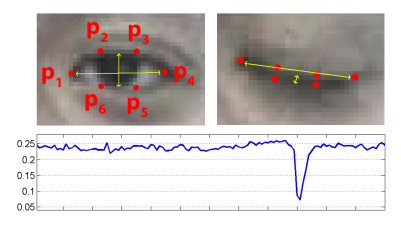

Figure 3: 
Dlib facial landmarks

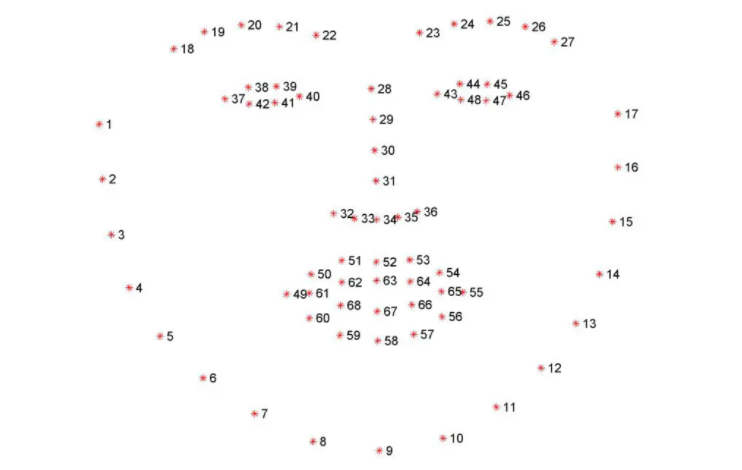

By applying dlib to recognize the face, the eyes, and calculate EAR, blinks can now be detected. More specifically, if the EAR falls below a certain threshold for at least 3 frames, it means that the eyes have closed. The 3-frame-period has been taken from the research of McIntire et al., (2014). They argued that a detection of less than 3 frames would be a faulty capture. This is also reasonable as a research into endogenous blinking by Stern et al., suggested that a blink lasts around 150 - 300ms, which is roughly 5-10 frames in a 30fps video. Furthermore, an average 7-frame-margin per blink is also attained by Soukupova and Cech during their experiments (2016). Heuristically, the EAR ratio threshold that works well for most researches is 0.2 to 0.3. However, through using opencv and visualizing the blink capturing process, it seems that 0.3 produced too many false blinks due to camera angle.Thus the former has been chosen. 

Figure 4: 
Blink capturing process test snapshot

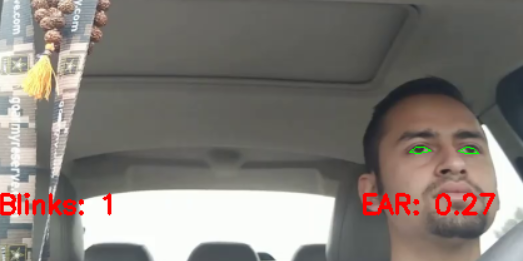

Note: The code for this can be found in the appendix

Since the idea is to base observations on blinks, the envisioned data would contain a blink for each row. Thus, for all videos, each of the blink will be recorded alongside variables that can be used for calculation of the desired blink attributes. If we consider the whole dataset to be made, it would contain n blinks from blink[1] to blink[n]. For each blink[i], the attributes are as follow:

(1) Duration[i]: This the time that the EAR within blink[i] remains below the threshold (duration of eyes closed for blink[i])

(2) Frequency: This is the number of blinks up until blink[i] over the number of frames until EAR of blink[i] is above the threshold (i.e. eye opening).  

(3) Amplitude: a heuristic measure for the approximate closing distance of the eye at blink[i] (difference between starting EAR of blink and max eye closure EAR of blink)

(4) PERCLOS: percentage of eyelid closure (PERCLOS), also used in the study 'Evaluation of Eye Metrics as a Detector of Fatigue' (McKinley et al., 2011). It can be calculated as 100 * (number frames with EAR under threshold of blink[i]) / (total frames from start until EAR of blink[i] exit threshold)

The first step for such derivations is to download all the necessary libraries as below.

In [1]:
# import the necessary libraries
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import pandas as pd
import imutils
import time
import dlib
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

It would be useful to define the eye aspect ratio calculation using a function as it would be used again later in multiple instances. Thus, a simple function that takes the eye landmarks (according to index from dlib model) and calculate the euclidean distance between the two pairs of vertical marks, the horizontal marks, then applying the following formula in figure 5 can be created.

Figure 5: 
EAR formula

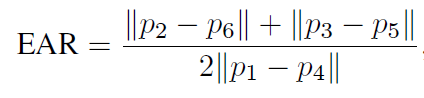

In [2]:
def eye_aspect_ratio(eye):
    # Vertical
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])  
    # Horizontal
    C = dist.euclidean(eye[0], eye[3])
    # EAR
    ear = (A + B)/(2.0 * C)
    
    return ear

In order to apply the function defined and perform any calculation, face and eye detection is necessary. Thus, the face detector and the dlib facial landmark prediction model will be loaded below.

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

With reference to figure 3, it is now necessary to grab the indexes of the left and right eye landmarks for future usage in calculation.

In [4]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

The large code cell below is the feature extractor. It will go through each of the video present in the desired directory and for each of those video, frame reading will be done frame-by-frame. Since colour is not a defining feature for the task of face detection and landmark prediction, it can be converted to grayscale for efficiency. Furthermore, since the dlib face detector uses a sliding window technique, it has been found through community research that a set size for all frames is better since the algorithm used is not scale invariant. After adjusting suitably, the EAR can be calculated and averaged as recommended by Soukupova and Cech (2016). 

By checking the conditions for the eyes as mentioned above and keeping track of the total frames as well as all EARs registered, the necessary attributes can be derived. Most notably, this can be done with the help of the start, bottom, and exit EAR. The bottom EAR of the blink can be determined by looking at the EAR registered while below the threshold (0.2). The EAR of the approximate start point of a blink can be determined by tracing back the previous 6 frames. This is taken from the information that a blink usually have a 7 frames margin. Since the moment that the code stop checking the threshold and determine a blink is at the EAR just above the threshold (exit EAR), it gives a 6 frames span (backward) for the ideal start point. If the blink takes longer, the code will start at the 7th frame backward until a value is above the threshold. The EAR there will be considered alongside its 3 previous frames to see which is the approximate start (i.e. max). The addition of 3 is to take into account the 10 frames width possible in an endogenous blink. 

It is noteworthy that if the blink is longer than 300ms (~10 frames for 30fps), it would no longer be considered endogenous according to Stern et al., (1984) and it would be difficult with logic and calculation alone to derive the start point. Thus, machinery or more complex theoretical mathematics would need to be applied. For now, the relative start point, bottom point, and exit point would be sufficient for the derivation of attributes. Further on in the project, reference code material can potentially be used as a tool to re-determine the the features and compare the options. Since the whole video data resource is heavy and takes time to run, the EDA will look at an excerpt of 5 participants. The extraction code can be referenced below and comments will be provided along the way for further intuition. 

In [ ]:
data = pd.DataFrame()
dir = r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Data\Fold1_part2'

# Looping through directory for mp4 files to read
for file in os.listdir(dir):
    if file.endswith(".mp4"):
        path=os.path.join(dir, file)
        print('Initiating {}'.format(file))
        
        # Setting thresholds
        eyeThresh = 0.2
        consecFrameThresh = 3
        
        # Setting counters
        blinkCount = 0
        blinkFrameCounter = 0
        frameCount = 0
        plinkFrameCounter = 0
        eyeCloseFrame = 0
        
        # Defining lists to store attributes
        allEars = []
        Duration = []
        Amplitude = []
        Frequency = []
        Frame = []
        PERCLOS = []
        
        # Read the video
        vs = FileVideoStream(path)
        vs.start()
        time.sleep(1.0)
        
        # While frame is incoming, read the frame
        while vs.more() == True:  
            frame = vs.read()
            # If the frame is not of type None, perform adjustments and face detection
            if vs.more() == True:
                frame =  imutils.resize(frame, width=450)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frameCount += 1     # Count and track each frame

                rects = detector(gray, 0)
                
                for rect in rects:
                    # Predict the landmarks and convert their coordinates into an array
                    shape =  predictor(gray, rect)
                    shape = face_utils.shape_to_np(shape)
                    # Extract the coordinates of left and right eyesusing the indexes derived before
                    leftEye = shape[lStart:lEnd]
                    rightEye = shape[rStart:rEnd]
                    # Calculate EARs and take average
                    leftEAR = eye_aspect_ratio(leftEye)
                    rightEAR = eye_aspect_ratio(rightEye)

                    ear = (leftEAR + rightEAR) / 2.0

                    allEars.append(ear)     # List to track all EARs
                    
                    # Check threshold and current EAR
                    if ear < eyeThresh:
                        plinkFrameCounter += 1     # potential blink frame counter
                        plinkEars.append(ear)      # List containing all EAR of closed eyes duration
                    # The instance that EAR comes above the threshold   
                    else:    
                        # Check duration potential blink against frame threshold
                        if plinkFrameCounter >= consecFrameThresh:
                            blinkCount += 1
                            eyeCloseFrame = eyeCloseFrame + plinkFrameCounter

                            bottomEar = min(plinkEars)    # Lowest EAR is the min from the tracked list

                            if max(allEars[-6:]) > eyeThresh:
                                startEar = max(allEars[-6:])
                            else:
                                j = 7
                                while max(allEars[-j:]) <= eyeThresh:
                                    j += 1
                                startEar = max(allEars[-(j+3):])

                            duration = plinkFrameCounter
                            Duration.append(duration)

                            frequency = blinkCount/frameCount
                            Frequency.append(frequency)
                            Frame.append(frameCount)

                            amplitude = startEar - bottomEar
                            Amplitude.append(amplitude)
                            
                            perclos = 100*eyeCloseFrame/frameCount
                            PERCLOS.append(perclos)
                            
                        # Resetting potential blink counter and EAR list
                        plinkFrameCounter = 0
                        plinkEars = []
                    
        print('{} features extracted'.format(file))
        vs.stop()
        cv2.destroyAllWindows()
        
        # Creating and extending dataframe
        mediumDf = pd.DataFrame({'Duration': Duration, 'Amplitude': Amplitude, 
                                 'Frequency': Frequency, 'State': file, 'PERCLOS':PERCLOS})
        data = data.append(mediumDf, ignore_index = True)
        print('Data updated to {} rows'.format(len(data)))
        print('----------------------------------------')

In [ ]:
data.shape # View dimension

In [ ]:
data.head() # Top rows

In [ ]:
data.tail() # Bottom rows

The features for EDA have successfully been extracted. Thus, the data could be write to csv for later usage. This concludes the crucial first objective - feature extraction code. The next section will be about exploring more into the extracted data.

In [ ]:
data.to_csv('f1p2.csv')

### 3. EDA

This section will go over the initial data and explore its aspects. The aim is to understand more about the data and identify any obvious patterns that can be recognized with plotting and the human-eyes. As seen in the data preview in the previous section, the State column currently contains both the participants and the labels of participants' state. Thus, it needs to be splitted. It may also be useful to get the order of the blinks per participant per state for later plotting. These steps are done in the code below.

In [121]:
data = pd.read_csv('eda.csv', index_col = 0) # Reading the previously extracted and stored data

In [122]:
# Loop over each instance in the State column to store the states and separate the Participant numbers

df = data.copy()
Participant = []

for i in df.index:
    p = 0
    p = df.iloc[i, 3].split('s')[1].split('.')[0]
    df.iloc[i, 3] = df.iloc[i, 3].split('s')[0]
    Participant.append(int(p))

df['Participant'] = Participant
df['State'] = pd.to_numeric(df.State)
df.reset_index(level=0, inplace=True)

In [123]:
# Getting blink order of each video (i.e. participant x at state y)
df['Rank'] = df.groupby(['Participant', 'State'])['index'].rank(method="first", ascending=True)
df['Rank'] = df.Rank.astype(int)
df = df.drop(columns = 'index', axis = 1)

In [124]:
df.head()

,Duration,Amplitude,Frequency,State,PERCLOS,Participant,Rank
0,3,0.048099,0.006536,0,1.960784,1,1
1,5,0.065888,0.009756,0,3.902439,1,2
2,3,0.068447,0.006897,0,2.528736,1,3
3,5,0.057336,0.009009,0,3.603604,1,4
4,3,0.165953,0.005669,0,2.154195,1,5


In [125]:
df.info() # Viewing dataframe's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Duration     790 non-null    int64  
 1   Amplitude    790 non-null    float64
 2   Frequency    790 non-null    float64
 3   State        790 non-null    int64  
 4   PERCLOS      790 non-null    float64
 5   Participant  790 non-null    int64  
 6   Rank         790 non-null    int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 40.2 KB


After carrying out the splitting of state and participant into different columns and getting the blink order (Rank) for each recording, it is observable that all features are of the desired numerical types. Using this dataframe, it is possible to plot and discover the actual number of detected blinks per participant per state as shown in the graph below.

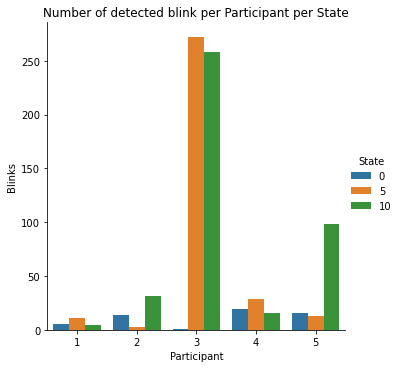

In [164]:
sns.catplot(x='Participant', hue="State",kind="count", 
            data=df).set(title = 'Number of detected blink per Participant per State', ylabel = 'Blinks')

The plot above depicted the number of detected blinks per state and per participant in the initial data. It can be infered that the blinking habbit of people are not the same. The difference in blinking habbit also applies per individual, depending on their state of mind regarding drowsiness. Within the data extract, participant 3 has the highest number of blinks. This is primarily the result of his blink habbit while drowsy and in low vigilance. The participant's blinks very little in the vigilant state but achieve a blink rate of over 2 blinks/second in state 5 and 10. After rechecking using the blink capture tab, the issue is due to the camera placement. It is of further distance from the eyes and much steeper in terms of angle as compared to other recordings. The video and blink capture for state 10 of participant 5 has also been checked due to the outstanding number of blinks as compared to others. However, it does not exhibit the same issue. Instead, the high number of blink is due to registered partial blinking of the participant where the eyes are opened but not fully. In general, there is no easily recognizable pattern displayed here. If all abnormal cases are checked and faulty records are removed for the dataset to be used in modelling, it should suffice considering the current technical constraint. Later on, it may be possible to get reference code material with more complex mathematic calulations to redetermine the blinks and make comparison.

In [133]:
df.head()

,Duration,Amplitude,Frequency,State,PERCLOS,Participant,Rank
0,3,0.048099,0.006536,0,1.960784,1,1
1,5,0.065888,0.009756,0,3.902439,1,2
2,3,0.068447,0.006897,0,2.528736,1,3
3,5,0.057336,0.009009,0,3.603604,1,4
4,3,0.165953,0.005669,0,2.154195,1,5


In [152]:
# Removing participant 3
df1 = df.copy()
df1 = df1[df1['Participant'] != 3]

#toDrop = []
#for i in df1.index:
#    if (df1.iloc[i,5] == 3) & ((df1.iloc[i,3] == 5) | (df1.iloc[i,3] == 10)):
#        toDrop.append(i)

#df1 = df1.drop(toDrop)

In [153]:
df1.shape # New dimension

(259, 7)

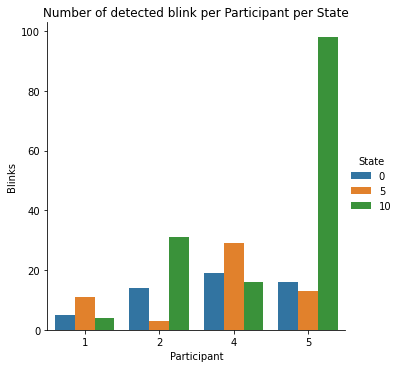

In [165]:
sns.catplot(x='Participant', hue="State",kind="count", 
            data=df1).set(title = 'Number of detected blink per Participant per State', ylabel = 'Blinks')

After removing participant 3, the detected blink distribution graph above can be seen much easier. There seems to be a repeat of trend between the pairs 1-4 and 2-5. For the first pair, state 5 has the highest blink count followed by 0 then 10. As for the second pair, state 10 takes the lead followed by 0 then 5. However, it is not possible to confirm these trends on the whole data yet as other videos still need to be extracted. Overall, the dataframe seems to indicate that blinks occur more when the mind becomes more fatigued as shown in the plot of average duration of blinks below. Moving on from the blink count, the main subject of the project - blink attributes should be explored. Having acquired the blinks' order of each participant per state, PERCLOS can be explored to see the changes over the blink sequences.

[Text(0.5, 1.0, 'Avg blink duration per State')]

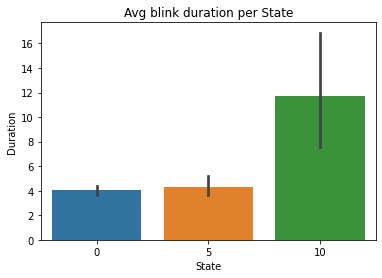

In [217]:
sns.barplot(data = df1, x = 'State', y = 'Duration').set(title = 'Avg blink duration per State')

Text(0.5, 1.0, 'Drowsy - 10')

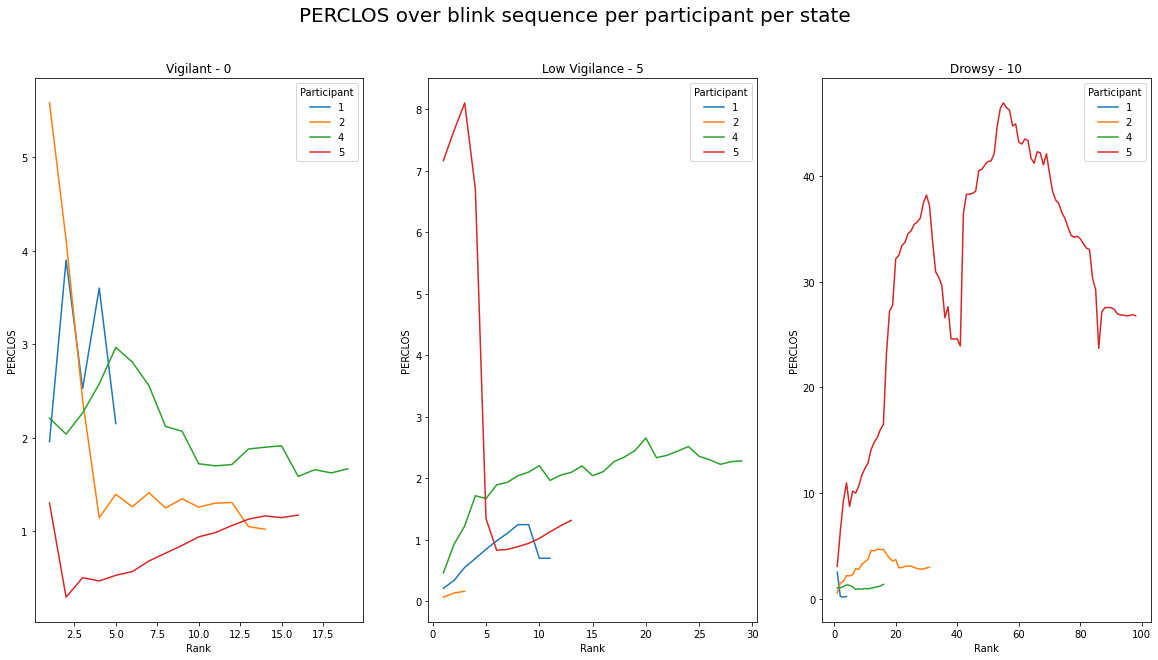

In [167]:
fig,ax = plt.subplots(1,3,figsize = (20,10))
fig.suptitle('PERCLOS over blink sequence per participant per state', size = 20)

sns.lineplot(data = df1[df1['State'] == 0], x = 'Rank', y = 'PERCLOS', hue = 'Participant', palette = 'tab10', ax = ax[0])
ax[0].set_title('Vigilant - 0')
                                      
sns.lineplot(data = df1[df1['State'] == 5], x = 'Rank', y = 'PERCLOS', hue = 'Participant', palette = 'tab10', ax = ax[1])
ax[1].set_title('Low Vigilance - 5')   

sns.lineplot(data = df1[df1['State'] == 10], x = 'Rank', y = 'PERCLOS', hue = 'Participant', palette = 'tab10', ax = ax[2])
ax[2].set_title('Drowsy - 10')   

The plots above depict the progression of PERCLOS over the blinking sequence of each participant in each state (0, 5, and 10). In this case, PERCLOS is referring to the percentage of frames that the eyes' EAR remain below the threshold. It differs from duration in the sense that duration is only about one particular blink, while PERCLOS is about each blink with respect to those before it. 

Due to the difference in number of blinks per person per state, it is observable that the lines all have different lenght across the plots. The PERCLOS range also varies between the graph for drowsy as compared to the other states,  primarily due to the significant increase in this measure observable in the drowsy state of participant 5. Without this effect, the blinks of participants will have from 0 to 8 percentage closure in the duration of 3 minutes. For participant 1,2, and 4, the percentage range narrows down when not vigilant. In contrast, the PERCLOS range of the fifth participant increases significantly when not vigilant.

Looking at the overall picture, there seems to be no unison in the order of PERCLOS value of participants at the first or last blink. While there are some similarity in (part of) the outlines of PERCLOS progression in the participants per state, this similarity is not strong enough or in unison (i.e. same for all participants) to create a clear conclusion about patterns that are observable. This also stems from the fact that this is not the whole dataset. However, it has been described in researches that PERCLOS is a viable measure for drowsiness. Thus, there may be an underlying links that need more complex methods such as AI to observe. 

Text(0.5, 1.0, 'P5')

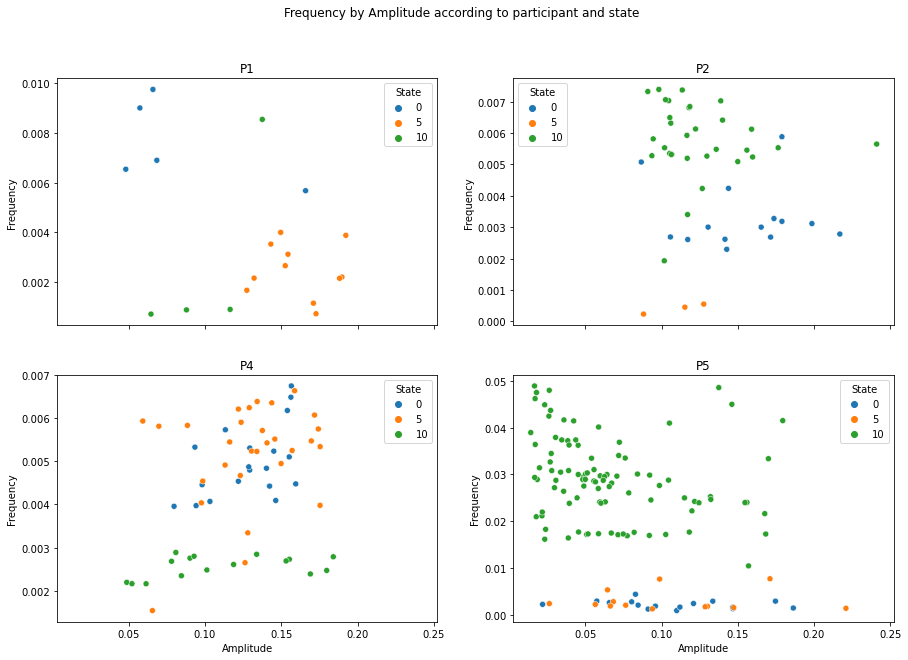

In [204]:
fig,ax = plt.subplots(2,2,figsize = (15,10), sharex = True)
fig.suptitle('Frequency by Amplitude according to participant and state')

sns.scatterplot(data = df1[df1.Participant == 1], x = 'Amplitude', y = 'Frequency', hue = 'State',
                palette = 'tab10', ax = ax[0,0])
sns.scatterplot(data = df1[df1.Participant == 2], x = 'Amplitude', y = 'Frequency', hue = 'State',
                palette = 'tab10', ax = ax[0,1])
sns.scatterplot(data = df1[df1.Participant == 4], x = 'Amplitude', y = 'Frequency', hue = 'State',
                palette = 'tab10', ax = ax[1,0])
sns.scatterplot(data = df1[df1.Participant == 5], x = 'Amplitude', y = 'Frequency', hue = 'State',
                palette = 'tab10', ax = ax[1,1])

ax[0,0].set_title('P1')
ax[0,1].set_title('P2')
ax[1,0].set_title('P4')
ax[1,1].set_title('P5')

Having looked at PERCLOS, the graphs above will examine Frequency and Amplitude distrbution of the participants to check for noteworthy insights. While the amplitude of all participants can be put on the same scale, it is as expected that participant 5 will have a higher frequency of blinks as compared to others. This can be infered from the high percentage of eyelid closure. Furthermore, the high frequency with the majority of blinks being on the lower end of the amplitude suggests that there are many partial blinks or eye-lids hovering around the EAR threshold. 

For participant 1, segmentation is clear. On average, blinks in vigilant is of less amplitude and higher frequency while low vigilance has the highest average amplitude but lower frequency. The drowsy state tends to have the lowest frequency with amplitude between that of the previous states. However, this segmentation does not carry across all participants. For example, participant 2 has the highest blink frequency when drowsy and largest amplitude when vigilant while participant 3 has lower frequency of blinking when fatigued with the amplitude spreaded out among blinks of all states.

[Text(0.5, 1.0, 'Frequency by amplitude of blinks')]

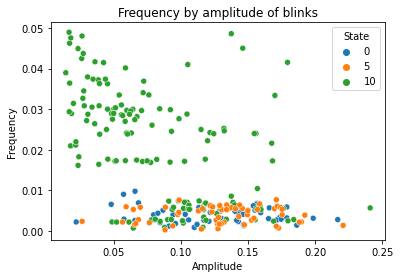

In [218]:
sns.scatterplot(data = df1, x = 'Amplitude', y = 'Frequency', hue = 'State',
                palette = 'tab10').set(title = 'Frequency by amplitude of blinks')

As shown in the combined scatter plot above, not all blinks are significantly imbued with certain patterns when the mind state varies. However, blinks in drowsy state tends to be of higher frequency and lower amplitude. Within the concentration of vigilant to low vigilance with mixes of drowsy blinks, it is difficult to determine a trend. Thus, this distribution alone would not be enough to determine the drowsy levels in the current dataframe. Upon introducing new data, it could be that a trend is observable. In such case, supervised algorithms or unsupervised models like Isolation Forest could be used to target the different states. On the other hand, it has been described in various papers of psychology/physiology/computer vision that blink features are applicable. Thus, if the introduction of new data still bring no visible pattern or indication of trends, the initially planned route of deep learning will be used to discover links that are more hidden. In terms of distribution of the two features above with respect to the dataframe, the graphs below can be observed

Text(0.5, 1.0, 'Frequency plot')

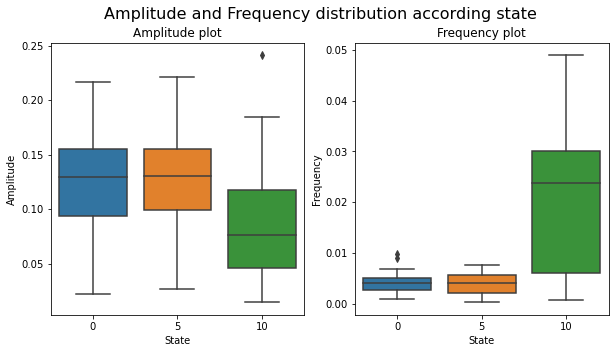

In [227]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
fig.suptitle('Amplitude and Frequency distribution according state', size = 16)
sns.boxplot(x = 'State', y="Amplitude",data=df1, ax = ax[0])
sns.boxplot(x = 'State', y="Frequency",data=df1, ax = ax[1])
ax[0].set_title('Amplitude plot')
ax[1].set_title('Frequency plot')

The figure above depicts the distribution of frequency and amplitude of blinks within the dataframe. From the amplitude plot, it is observable that the min and max if all states are outstretched as compared to the majority of the instances. Between vigilant and low vigilance, the min and max points of the later are slightly higher than that of the former while the Q1 of state 0 is slightly below that of state 5. However, their median and Q3 fall on approximately the same value. The depiction here shows that the distributions of these states in term of amplitude are very close to each other. As for the amplitude of the drowsy state, the majority of its distribution falls below the other categories. This is in contrast to the frequency.

While the distribution of frequency when vigilant in the dataframe is more narrow then when in low vigilance, the majority of their instances are on the same range. However, the distribution of drowsy state's frequency is much larger and higher than the other states. It also have the potential to reach a much higher value. Combining with what has been observed above, the notion seems to be that drowsy blinks on average have lower amplitude and higher frequency. Also, vigilant have a more varied distribution in amplitude but it is the opposite for frequency as compared to low vigilance. It is noteworthy that this is the indication of the current data (with much influence from participant 5), trends may be different or clearer with the introduction of more observations. As mentioned above, if participant 5 is removed, there may be no significant distributional trend that can be observed. Thus, the need for a tool to look for hidden relationships between attributes and states is emphasized. 

[Text(0.5, 1.0, 'Avg blink duration per Participant per State')]

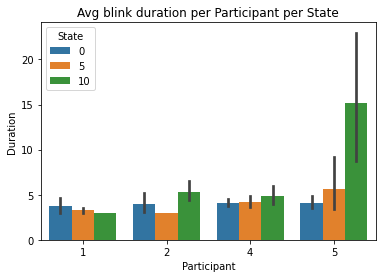

In [208]:
sns.barplot(data = df1, x = 'Participant', y = 'Duration', 
            hue ='State').set(title = 'Avg blink duration per Participant per State')

Having viewed the frequency, amplitude, and PERCLOS, the final attribute to explore is the duration. Here, it is observable that even without the influence of participant 5 and respective series of partial blinks/eyelids fluctuation, the notion is that drowsy blinks tend to be of more duration. However, the case varies with the comparison of vigilant and low vigilance.

### 4. Conclusion

Within this notebook, the blink features have been extracted and explored for future preparation and modelling to determine fatigue levels. The video data has been carefully selected for realism and inclusivity, while the extraction process is based on insights from researches in multiple fields. Even though there are still some heuristic aspects to the approximation of attributes, logical reasonings from concepts introduced by researches are applied extensively. The initial exploration of data showed that the recognition of patterns using only observation brings minimal result. This is as expected since in all studies, more advance techniques with the capability of discerning either highly accurate physiological signs or undelying links between the features and target are used. After consulting more in-depth with experts, the takeaway is that the current logical reasoning to gather the blink attributes is sufficient for now and the data can be used for heuristic experimentation. Later on, it may be helpful to gather reference code material with more theoretical mathematic solutions for feature extraction, apply such material, and evaluate the result for more insight if there is still time. 

### 5. Reference

[1]	E. Tadesse, W. Sheng, and M. Liu. (2014). Driver drowsiness detection through HMM based dynamic modeling. IEEE International Conference on Robotics and Automation (ICRA), pp. 4003-4008. Doi: 10.1109/ICRA.2014.6907440. 

[2]	Faber, L.G., Maurits, N M., & Lorist, M.M. (2012). Mental Fatigue Affects Visual Selective Attention. PLoS ONE, 7(10), e48073. https://doi.org/10.1371/journal.pone.0048073 

[3]	McIntire, L. K., McKinley, R. A., Goodyear, C., & McIntire, J. P. (2014). Detection of vigilance performance using eye blinks. Applied Ergonomics, 45(2), 354–362. https://doi.org/10.1016/j.apergo.2013.04.020 

[4] McKinley, R. A., McIntire, L. K., Schmidt, R., Repperger, D. W., & Caldwell, J. A. (2011). Evaluation of Eye Metrics as a Detector of Fatigue. Human Factors: The Journal of the Human Factors and Ergonomics Society, 53(4), 403–414. https://doi.org/10.1177/0018720811411297

[5]	Moradi, A., Nazari, S.S.H., & Rahmani, K. (2019). Sleepiness and the risk of road traffic accidents: A systematic review and meta-analysis of previous studies. Transportation Research Part F: Traffic Psychology and Behavior, 65, 620–629. https://doi.org/10.1016/j.trf.2018.09.013 

[6] Stern, J.A., Walrath, L.C., & Goldstein, R. (1984). The endogenous eyeblink. Psychophysiology, 21(1), 22–33. https://doi.org/10.1111/j.1469-8986.1984.tb02312.x

[7] Soukupova, T., Cech., J. (2016). Real-time eye blink detection using facial landmarks. 21st Computer Vision Winter Workshop (CVWW2016), 1–8.	

[8] SWOV (2019). Fatigue. SWOV Fact sheet, September 2019. SWOV, The Hague.

[9] Svensson, U. (2004). VTI särtryck 362 A · 2004 Blink behaviour based drowsiness detection – method development and validation.


### 6. Appendix

In [5]:
# CODE FOR BLINK CAPTURE TEST 
# Note: Run all import and definition cells first
data = pd.DataFrame()
dir = r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Data\Test & Debug'

for file in os.listdir(dir):
    if file.endswith(".mp4"):
        path=os.path.join(dir, file)
        
        eyeThresh = 0.2
        consecFrameThresh = 3
        blinkCount = 0
        blinkFrameCounter = 0
        frameCount = 0
        plinkFrameCounter = 0
        
        vs = FileVideoStream(path)
        vs.start()
        time.sleep(1.0)

        while vs.more() == True:   
            frame = vs.read()
            #print('frame read - {}'.format(vs.more()))
            if vs.more() == True:
                frame =  imutils.resize(frame, width=450)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frameCount += 1

                rects = detector(gray, 0)
                for rect in rects:
                    shape =  predictor(gray, rect)
                    shape = face_utils.shape_to_np(shape)

                    leftEye = shape[lStart:lEnd]
                    rightEye = shape[rStart:rEnd]
                    leftEAR = eye_aspect_ratio(leftEye)
                    rightEAR = eye_aspect_ratio(rightEye)

                    ear = (leftEAR + rightEAR) / 2.0


                    leftEyeHull = cv2.convexHull(leftEye)
                    rightEyeHull = cv2.convexHull(rightEye)
                    cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
                    cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

                    if ear < eyeThresh:
                        plinkFrameCounter += 1
                        
                    else:    
                        if plinkFrameCounter >= consecFrameThresh:
                            blinkCount += 1

                        plinkFrameCounter = 0
                
                    cv2.putText(frame, "Blinks: {}".format(blinkCount), (10, 210),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 210),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                # show the frame
                cv2.imshow("Frame", frame)
                key = cv2.waitKey(1) & 0xFF

                # if the `q` is pressed, break from the loop
                if key == ord("q"):
                    break
                    
        vs.stop()
        cv2.destroyAllWindows()